<a href="https://colab.research.google.com/github/hbisgin/datamining/blob/main/LabClusterEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score

#Dataset creation with sklearn tools (make_blobs)

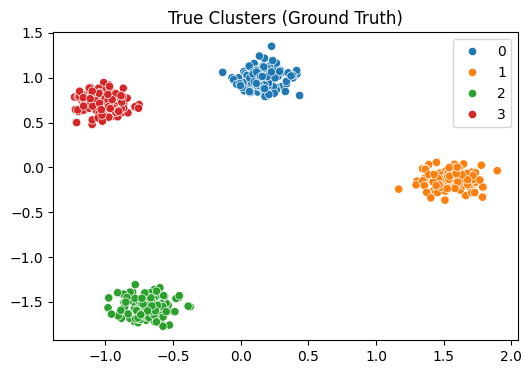

In [2]:
# Create blob-like data with clear clusters. Please note that these are perfect clusters with create.
#So, the clustering structure will be obvious to the algorithms

X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize the true clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_true, palette='tab10')
plt.title("True Clusters (Ground Truth)")
plt.show()

#Using elbow method to determine the number of cluster

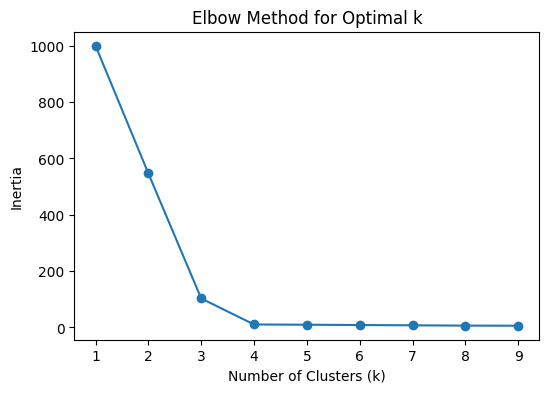

In [3]:
inertia = [] #Inertia is the sum of squared distances from each point to its assigned cluster center.
#inertia is a metric that measures how internally coherent the clusters are


K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

#Apply both k-means and DBScan on the same data. Please note that DBSCAN doesn't require the number of clusters, but it asks epsilon and min_samples (min points)

In [ ]:
# Best guess from elbow method (should be 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# DBSCAN (tune these for best results)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

#Let's visualize both clustering outputs

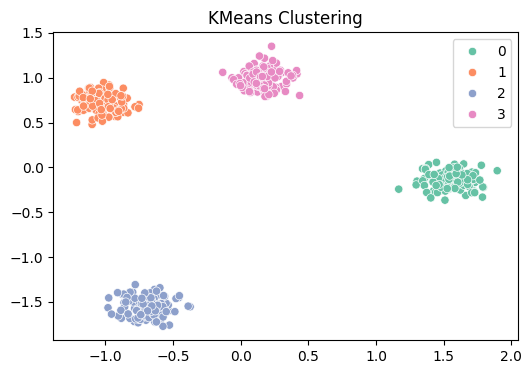

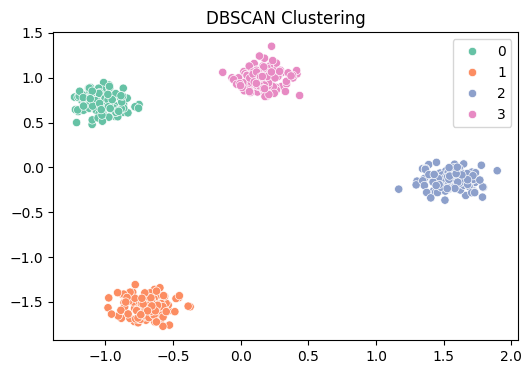

In [5]:
# Visualize KMeans
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='Set2')
plt.title("KMeans Clustering")
plt.show()

# Visualize DBSCAN
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette='Set2')
plt.title("DBSCAN Clustering")
plt.show()

#Adjusted Rand Index calculations

In [6]:
ari_kmeans = adjusted_rand_score(y_true, kmeans_labels)
ari_dbscan = adjusted_rand_score(y_true, dbscan_labels)

print("Adjusted Rand Index (KMeans):", ari_kmeans)
print("Adjusted Rand Index (DBSCAN):", ari_dbscan)

Adjusted Rand Index (KMeans): 1.0
Adjusted Rand Index (DBSCAN): 1.0


#Can you do the same experiment with iris data?

In [21]:
from sklearn.datasets import load_iris

iris = load_iris()
X_iris=iris.data
y_iris=iris.target
scaler = StandardScaler()
X_scaled_iris=scaler.fit_transform(X_iris)

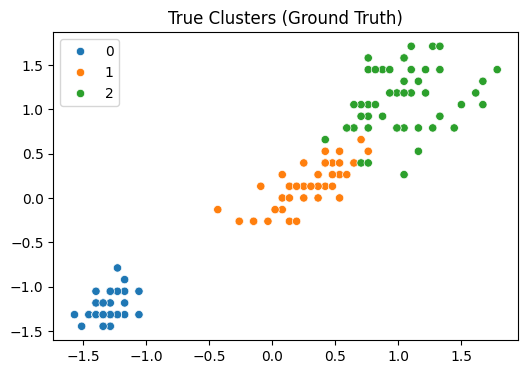

In [44]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled_iris[:, 2], y=X_scaled_iris[:, 3], hue=y_iris, palette='tab10')
plt.title("True Clusters (Ground Truth)")
plt.show()

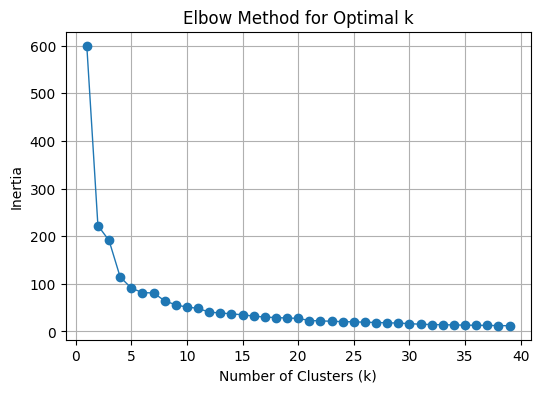

In [33]:
inertia = []
for i in range(1,40):
    k_mean = KMeans(i,random_state=42)
    k_mean.fit(X_scaled_iris)
    inertia.append(k_mean.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,40), inertia, marker='o', linewidth=1)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

    

## best result is 35

In [34]:
from sklearn.metrics import silhouette_score


sil_scores2= []

for min_s in range(5,50):
    for eps2 in np.arange(0.5,10,0.5):
        dbscan = DBSCAN(eps=eps2, min_samples=min_s)  
        db_labels = dbscan.fit_predict(X_scaled_iris)
        n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
        
        if n_clusters < 2:
            continue
        score = silhouette_score(X_scaled_iris, db_labels)
        sil_scores2.append(score)
        print(f"epsilon ={eps2}, min_sample={min_s} silhouette score={score:.4f}")

epsilon =0.5, min_sample=5 silhouette score=0.3565
epsilon =1.0, min_sample=5 silhouette score=0.5383
epsilon =1.5, min_sample=5 silhouette score=0.5818
epsilon =0.5, min_sample=6 silhouette score=0.1959
epsilon =1.0, min_sample=6 silhouette score=0.5383
epsilon =1.5, min_sample=6 silhouette score=0.5818
epsilon =0.5, min_sample=7 silhouette score=0.1391
epsilon =1.0, min_sample=7 silhouette score=0.5383
epsilon =1.5, min_sample=7 silhouette score=0.5818
epsilon =0.5, min_sample=8 silhouette score=0.1882
epsilon =1.0, min_sample=8 silhouette score=0.5383
epsilon =1.5, min_sample=8 silhouette score=0.5818
epsilon =0.5, min_sample=9 silhouette score=0.0693
epsilon =1.0, min_sample=9 silhouette score=0.5383
epsilon =1.5, min_sample=9 silhouette score=0.5818
epsilon =0.5, min_sample=10 silhouette score=0.0094
epsilon =1.0, min_sample=10 silhouette score=0.5390
epsilon =1.5, min_sample=10 silhouette score=0.5818
epsilon =0.5, min_sample=11 silhouette score=0.0479
epsilon =1.0, min_sample=11

#dbscan best results when epsilon = 1.5 and 41>min_samples >32

In [ ]:
# Best guess from elbow method (should be 4)
kmeans = KMeans(n_clusters=35, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled_iris)

# DBSCAN (tune these for best results)
dbscan = DBSCAN(eps=1.5, min_samples=32)
dbscan_labels = dbscan.fit_predict(X_scaled_iris)

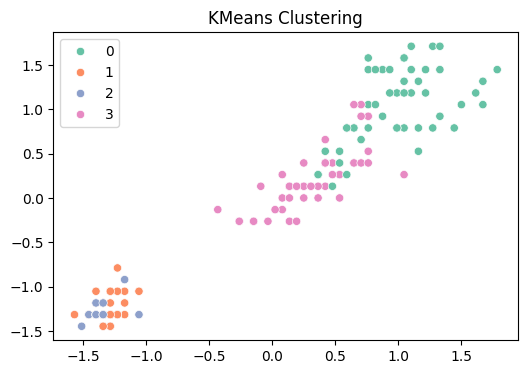

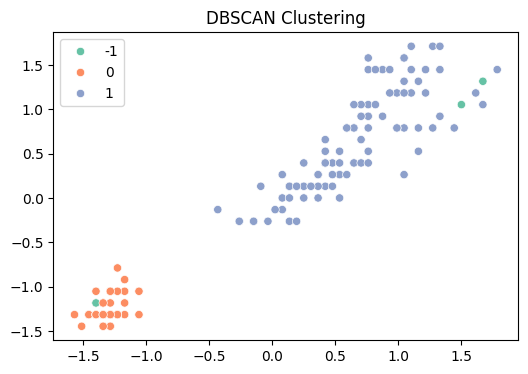

In [47]:
# Visualize KMeans
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled_iris[:, 2], y=X_scaled_iris[:, 3], hue=kmeans_labels, palette='Set2')
plt.title("KMeans Clustering")
plt.show()

# Visualize DBSCAN
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_scaled_iris[:, 2], y=X_scaled_iris[:, 3], hue=dbscan_labels, palette='Set2')
plt.title("DBSCAN Clustering")
plt.show()

In [42]:
ari_kmeans = adjusted_rand_score(y_iris, kmeans_labels)
ari_dbscan = adjusted_rand_score(y_iris, dbscan_labels)

print("Adjusted Rand Index (KMeans):", ari_kmeans)
print("Adjusted Rand Index (DBSCAN):", ari_dbscan)

Adjusted Rand Index (KMeans): 0.432804702527474
Adjusted Rand Index (DBSCAN): 0.5535820784912958
